# Built in Functions

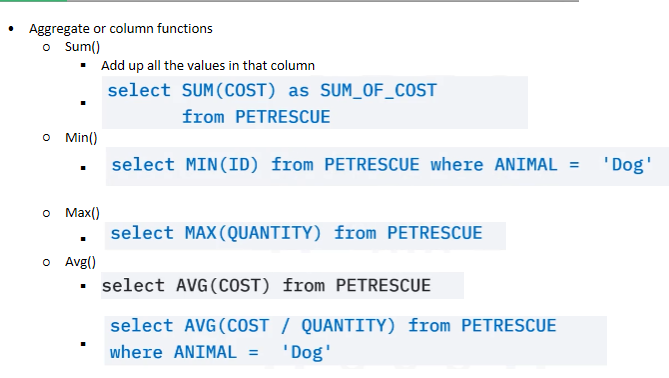

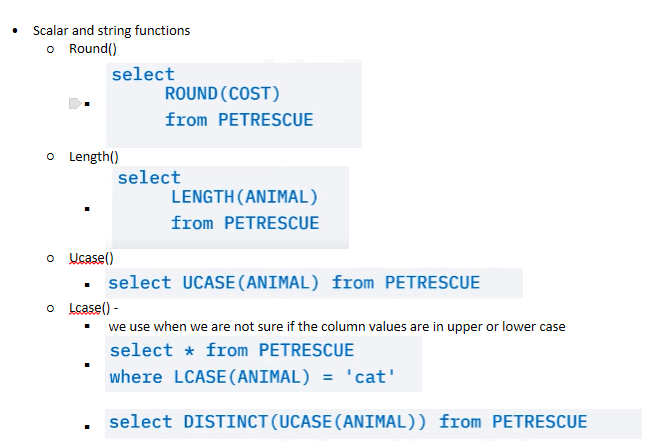

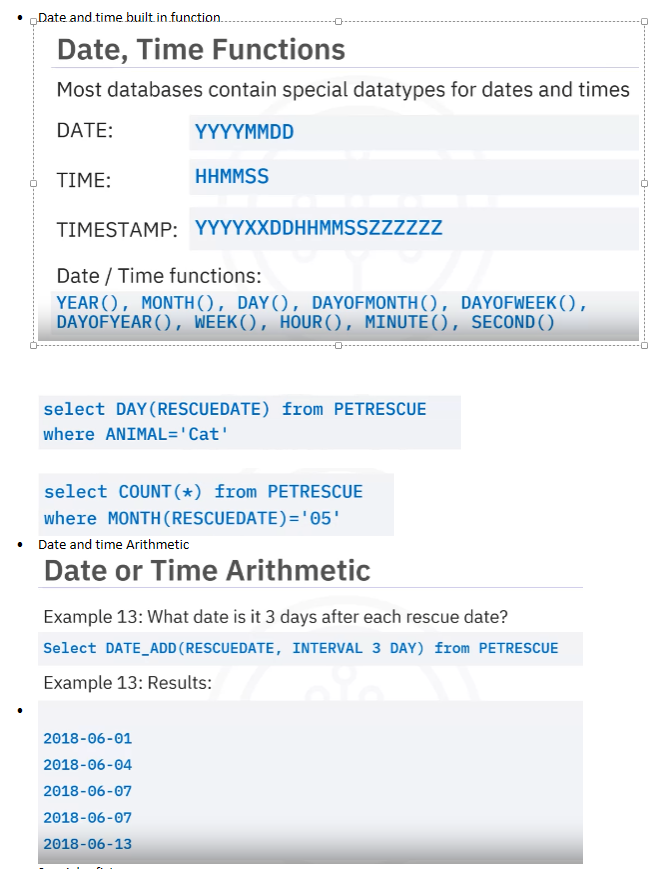

In [1]:
import pandas as pd
import sqlite3 as sql

In [2]:
cnn = sql.connect('test.db')

In [3]:
%load_ext sql

In [4]:
%sql sqlite:///test.db

In [7]:
%%sql
drop table if exists PETRESCUE;

create table PETRESCUE (
	ID INTEGER NOT NULL,
	ANIMAL VARCHAR(20),
	QUANTITY INTEGER,
	COST DECIMAL(6,2),
	RESCUEDATE DATE,
	PRIMARY KEY (ID)
	);

insert into PETRESCUE values 
	(1,'Cat',9,450.09,'2018-05-29'),
	(2,'Dog',3,666.66,'2018-06-01'),
	(3,'Dog',1,100.00,'2018-06-04'),
	(4,'Parrot',2,50.00,'2018-06-04'),
	(5,'Dog',1,75.75,'2018-06-10'),
	(6,'Hamster',6,60.60,'2018-06-11'),
	(7,'Cat',1,44.44,'2018-06-11'),
	(8,'Goldfish',24,48.48,'2018-06-14'),
	(9,'Dog',2,222.22,'2018-06-15')
	
;

 * sqlite:///test.db
Done.
Done.
9 rows affected.


[]

# AGGREGATION FUNCTIONS

In [8]:
%%sql
select * from petrescue

 * sqlite:///test.db
Done.


ID,ANIMAL,QUANTITY,COST,RESCUEDATE
1,Cat,9,450.09,2018-05-29
2,Dog,3,666.66,2018-06-01
3,Dog,1,100,2018-06-04
4,Parrot,2,50,2018-06-04
5,Dog,1,75.75,2018-06-10
6,Hamster,6,60.6,2018-06-11
7,Cat,1,44.44,2018-06-11
8,Goldfish,24,48.48,2018-06-14
9,Dog,2,222.22,2018-06-15


In [11]:
%%sql
select sum(cost) as sum_of_cost from petrescue

 * sqlite:///test.db
Done.


sum_of_cost
1718.24


In [13]:
%%sql
select max(quantity) from petrescue

 * sqlite:///test.db
Done.


max(quantity)
24


In [14]:
%%sql
select min(quantity) from petrescue

 * sqlite:///test.db
Done.


min(quantity)
1


# SCALAR Functions

In [21]:
%%sql
select round(cost,0) from petrescue

 * sqlite:///test.db
Done.


"round(cost,0)"
450.0
667.0
100.0
50.0
76.0
61.0
44.0
48.0
222.0


In [22]:
%%sql
select length(animal), animal from petrescue

 * sqlite:///test.db
Done.


length(animal),ANIMAL
3,Cat
3,Dog
3,Dog
6,Parrot
3,Dog
7,Hamster
3,Cat
8,Goldfish
3,Dog


# String
## SQLLITE - UPPER - UCASE

In [25]:
%%sql
select upper(animal) from petrescue

 * sqlite:///test.db
Done.


upper(animal)
CAT
DOG
DOG
PARROT
DOG
HAMSTER
CAT
GOLDFISH
DOG


In [31]:
%%sql
select * from petrescue where lower(animal)='dog'

 * sqlite:///test.db
Done.


ID,ANIMAL,QUANTITY,COST,RESCUEDATE
2,Dog,3,666.66,2018-06-01
3,Dog,1,100,2018-06-04
5,Dog,1,75.75,2018-06-10
9,Dog,2,222.22,2018-06-15


# Date function
## SQLITE different function format - strftime
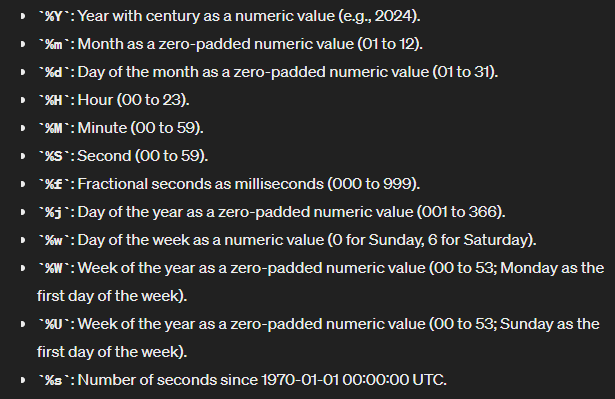
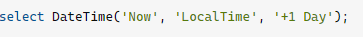

In [37]:
%%sql
select strftime('%d', rescuedate) as day, rescuedate from petrescue where lower(animal)='cat'

 * sqlite:///test.db
Done.


day,RESCUEDATE
29,2018-05-29
11,2018-06-11


In [38]:
%%sql
select strftime('%m', rescuedate) as day, rescuedate from petrescue where lower(animal)='cat'

 * sqlite:///test.db
Done.


day,RESCUEDATE
05,2018-05-29
06,2018-06-11


In [39]:
%%sql
select strftime('%y', rescuedate) as day, rescuedate from petrescue where lower(animal)='cat'

 * sqlite:///test.db
Done.


day,RESCUEDATE
None,2018-05-29
None,2018-06-11


In [50]:
%%sql
select date(rescuedate,'+3 days') as days, rescuedate from petrescue 

 * sqlite:///test.db
Done.


days,RESCUEDATE
2018-06-01,2018-05-29
2018-06-04,2018-06-01
2018-06-07,2018-06-04
2018-06-07,2018-06-04
2018-06-13,2018-06-10
2018-06-14,2018-06-11
2018-06-14,2018-06-11
2018-06-17,2018-06-14
2018-06-18,2018-06-15


In [51]:
%%sql
select date(rescuedate,'+2 months') as date, rescuedate from petrescue

 * sqlite:///test.db
Done.


date,RESCUEDATE
2018-07-29,2018-05-29
2018-08-01,2018-06-01
2018-08-04,2018-06-04
2018-08-04,2018-06-04
2018-08-10,2018-06-10
2018-08-11,2018-06-11
2018-08-11,2018-06-11
2018-08-14,2018-06-14
2018-08-15,2018-06-15


In [52]:
%%sql
select date(rescuedate,'-3 days') as date, rescuedate from petrescue

 * sqlite:///test.db
Done.


date,RESCUEDATE
2018-05-26,2018-05-29
2018-05-29,2018-06-01
2018-06-01,2018-06-04
2018-06-01,2018-06-04
2018-06-07,2018-06-10
2018-06-08,2018-06-11
2018-06-08,2018-06-11
2018-06-11,2018-06-14
2018-06-12,2018-06-15


In [78]:
%%sql
select strftime('%Y-%m-%d','now')-strftime('%Y-%m-%d',rescuedate) as date, rescuedate, date('now') from petrescue

 * sqlite:///test.db
Done.


date,RESCUEDATE,date('now')
6,2018-05-29,2024-04-20
6,2018-06-01,2024-04-20
6,2018-06-04,2024-04-20
6,2018-06-04,2024-04-20
6,2018-06-10,2024-04-20
6,2018-06-11,2024-04-20
6,2018-06-11,2024-04-20
6,2018-06-14,2024-04-20
6,2018-06-15,2024-04-20


In [88]:
%%sql
select date('now')-date(rescuedate) as date, rescuedate, date('now') from petrescue

 * sqlite:///test.db
Done.


date,RESCUEDATE,date('now')
6,2018-05-29,2024-04-20
6,2018-06-01,2024-04-20
6,2018-06-04,2024-04-20
6,2018-06-04,2024-04-20
6,2018-06-10,2024-04-20
6,2018-06-11,2024-04-20
6,2018-06-11,2024-04-20
6,2018-06-14,2024-04-20
6,2018-06-15,2024-04-20


In [89]:
%%sql
SELECT 
    CAST((julianday('now') - julianday(rescuedate)) / 365 AS INTEGER) AS years,
    CAST(((julianday('now') - julianday(rescuedate)) % 365) / 30 AS INTEGER) AS months,
    CAST((julianday('now') - julianday(rescuedate)) % 30 AS INTEGER) AS days,
    rescuedate,
    date('now') AS current_date
FROM petrescue;

 * sqlite:///test.db
Done.


years,months,days,RESCUEDATE,current_date
5,10,23,2018-05-29,2024-04-20
5,10,20,2018-06-01,2024-04-20
5,10,17,2018-06-04,2024-04-20
5,10,17,2018-06-04,2024-04-20
5,10,11,2018-06-10,2024-04-20
5,10,10,2018-06-11,2024-04-20
5,10,10,2018-06-11,2024-04-20
5,10,7,2018-06-14,2024-04-20
5,10,6,2018-06-15,2024-04-20


In [95]:
%%sql
select count(*) as number_of_rescue from petrescue where strftime('%m', rescuedate)='05'

 * sqlite:///test.db
Done.


number_of_rescue
1


In [98]:
%%sql
select id, strftime(rescuedate,'+1 years') as target_date from petrescue

 * sqlite:///test.db
Done.


ID,target_date
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None
